# **Análise de Microdados ENEM 2019**

# Apresentação


### Resumo
Este documento tem o objetivo apresentar um estudo de **Data Science**: uma análise exploratória sobre o Exame Nacional do Ensino Médio - o ENEM - na sua edição do ano de 2019 e criação de um modelo de Machine Learning.


 
### Autores
1.   Resolução dos desafios: [Gustavo Pretto Scholze](https://www.linkedin.com/in/gstvscholze/) - Graduando em Engenharia de Minas na Universidade Federal do Rio Grande do Sul.

2.   Apoio: [Data Science Guild](https://github.com/DataScienceGuild): Liga acadêmica com objetivo de conectar estudantes de diversas áreas ao mercado de Data Science.

### Ferramentas Utilizadas
A análise foi efetuada utilizando-se a linguagem de programação **Python** e suas bibliotecas para análise e processamento de dados **Pandas** e **NumPy**, bem como as bibliotecas **Matplotlib** e **Seaborn** para visualização de dados, além de API´s e outras bibliotecas que serão apresentadas no dercorrer do documento.

# Coleta de Dados


Os dados foram disponibilizados pelo INEP e Alura e contém cerca de 128 mil registros de inscrições de candidatos que realizaram as provas do ENEM 2019.

# Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn import metrics

!pip install 'fsspec>=0.3.3'
import dask.dataframe as dd


sns.color_palette('Blues')
sns.set_context("notebook")

## Dados Gerais

In [2]:
dados = pd.read_csv('/home/gustavo/ENEM analysis/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [3]:
dados.shape

(127380, 136)

In [4]:
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [5]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [6]:
dados[["SG_UF_RESIDENCIA", "Q025"]]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


In [7]:
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [8]:
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [9]:
len(dados["SG_UF_RESIDENCIA"].unique())

27

In [10]:
dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [11]:
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [12]:
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

<AxesSubplot:>

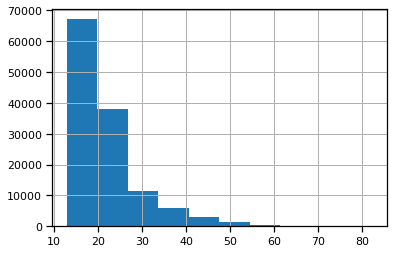

In [13]:
dados["NU_IDADE"].hist()

<AxesSubplot:>

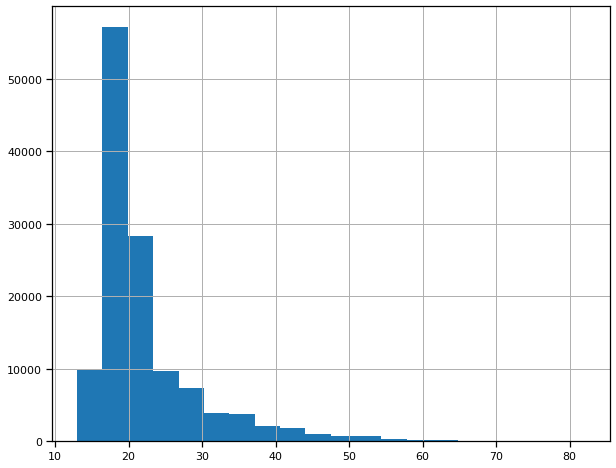

In [14]:
dados["NU_IDADE"].hist(bins = 20, figsize = (10,8))

In [15]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

<AxesSubplot:>

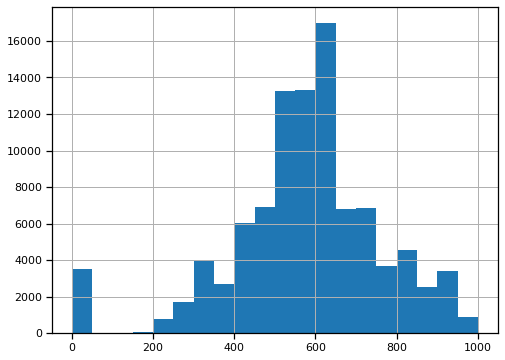

In [16]:
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize=(8, 6))

<AxesSubplot:>

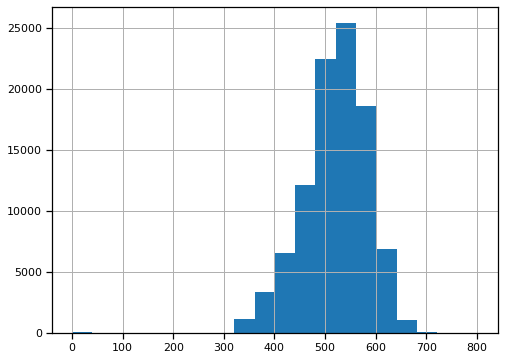

In [17]:
dados["NU_NOTA_LC"].hist(bins = 20, figsize=(8, 6))

In [18]:
dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

In [19]:
dados["NU_NOTA_REDACAO"].std()

188.07645455749753

In [20]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

bx_data = dados[provas].describe()
bx_data

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


<AxesSubplot:>

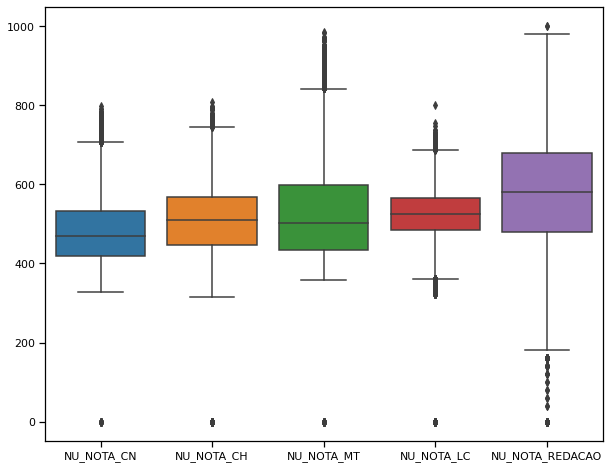

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=dados[provas])

### Proporção dos inscritos por idade.

In [22]:
idades = dados["NU_IDADE"].value_counts(normalize=True).sort_index()
idades_prop = idades.apply(lambda value: "{:.2f}%".format(value))
idades_dict = {
    'idade':idades.index,
    'proporcao':idades.values,
    'proporcao_porcentagem': idades_prop.values 
}

df_idade = pd.DataFrame(data=idades_dict)
df_idade

,idade,proporcao,proporcao_porcentagem
0,13,0.000031,0.00%
1,14,0.001107,0.00%
2,15,0.015772,0.02%
3,16,0.061470,0.06%
4,17,0.166871,0.17%
...,...,...,...
60,73,0.000016,0.00%
61,75,0.000016,0.00%
62,76,0.000008,0.00%
63,77,0.000008,0.00%


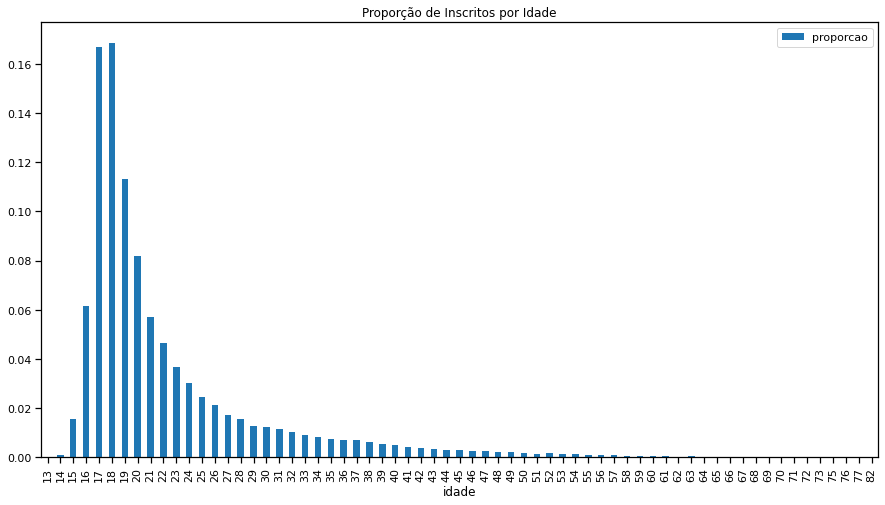

In [23]:
df_idade.plot.bar(x='idade', figsize=(15,8))
plt.title("Proporção de Inscritos por Idade")
plt.show()

Quantidade de inscritos entre 17 e 21 anos é bem maior, comparado às outras idades. Esse é o intervalo em que, usualmente, um(a) estudante está terminando o Ensino Médio, então é normal a quantidade ser elevada nesta faixa.

### Descobrir de quais estados são os inscritos com 13 anos.

In [24]:
inscritos_13 = dados[dados['NU_IDADE'] == 13]['SG_UF_RESIDENCIA']
print('Os estados que possuem inscritos com 13 anos são: ', inscritos_13.values)

Os estados que possuem inscritos com 13 anos são:  ['SP' 'MT' 'AP' 'BA']


Os inscritos de 13 anos estão, seguindo a lógica, distribuídos entre alguns dos estados mais populosos do Brasil, como São Paulo e Bahia¹. O Mato Grosso, está entre os 20 mais populosos e a surpresa neste dataset parece ser o estado do Amapá.


¹https://agenciadenoticias.ibge.gov.br/agencia-sala-de-imprensa/2013-agencia-de-noticias/releases/28668-ibge-divulga-estimativa-da-populacao-dos-municipios-para-2020

Já pessoa com maior idade, neste dataset, possui 82 anos e mora no Rio de Janeiro.

In [25]:
inscrito_max = dados[dados['NU_IDADE'] == dados.NU_IDADE.max()]['SG_UF_RESIDENCIA']
print(f"A maior idade encontrada no dataset é {dados.NU_IDADE.max()} e reside no {inscrito_max.values.all()}")

A maior idade encontrada no dataset é 82 e reside no RJ


### Plotar os Histogramas das idades dos treineiros e não treineiros.

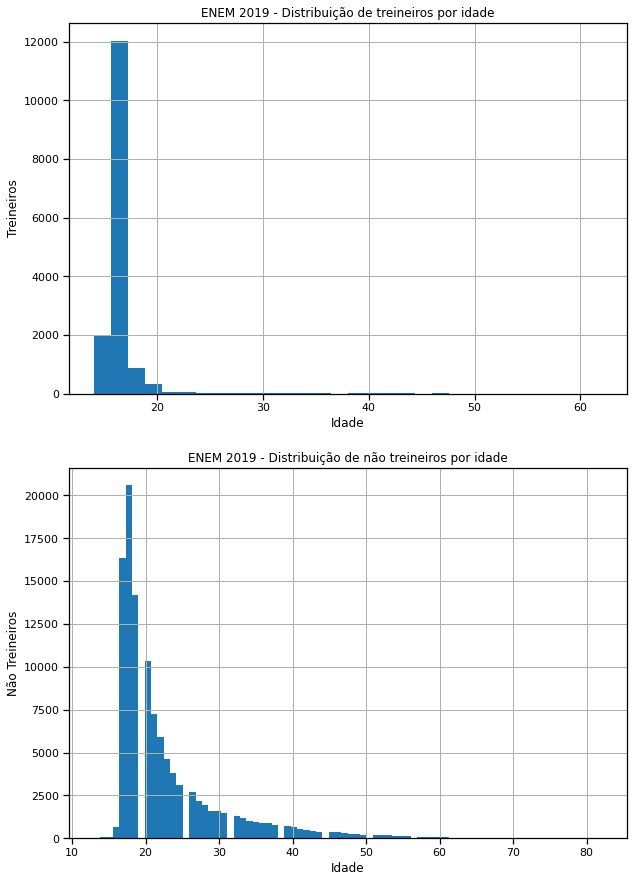

In [26]:
# Config comum aos gráficos
fig, axs = plt.subplots(2, 1, figsize=(10,15))

# Treineiros
df_treineiros = dados.query("IN_TREINEIRO == 1")["NU_IDADE"]
axs[0].set_title('ENEM 2019 - Distribuição de treineiros por idade');
df_treineiros.hist(bins = 30, ax=axs[0])
axs[0].set(xlabel='Idade', ylabel='Treineiros')

# Não Treineiros
df_nao_treineiros = dados.query("IN_TREINEIRO != 1")["NU_IDADE"]
axs[1].set_title('ENEM 2019 - Distribuição de não treineiros por idade');
df_nao_treineiros.hist(bins = 80, ax=axs[1])
axs[1].set(xlabel='Idade', ylabel='Não Treineiros')

plt.show()

Quantidade de treineiros está em um intervado de idade até aproximadamente 22 anos. Muitos jovens testando seus conhecimentos antes de realizar a prova "oficialmente" no intuito de obter notas melhores, ou como preparação para outras competições, como olimpíadas de matemática e história, por exemplo.

### Comparar as distribuições das provas em inglês espanhol

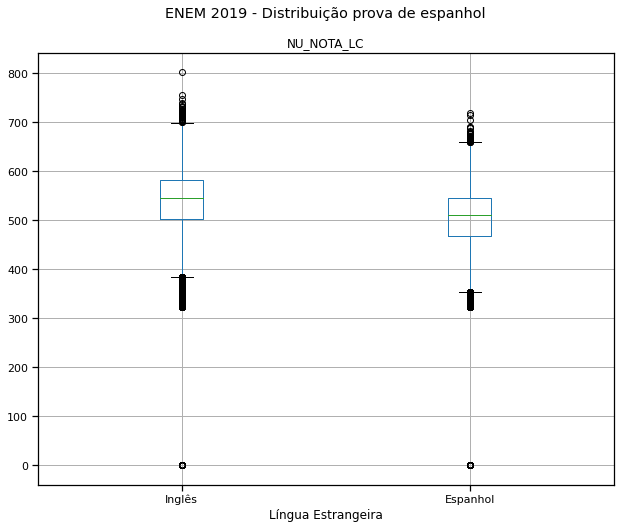

In [27]:
ax = dados.boxplot(by='TP_LINGUA', column=['NU_NOTA_LC'], grid=True, figsize= (10,8))
ax.set_xticklabels(['Inglês','Espanhol'])
plt.xlabel('Língua Estrangeira')
plt.suptitle('ENEM 2019 - Distribuição prova de espanhol')
plt.show()

Apesar do espanhol ser uma língua que se aproxima muito da língua portuguesa, possuir a mesma origem - o latim -, o consumo de produtos e principalmente entretenimento (redes sociais, músicas, filmes, etc) de língua inglesa pode influenciar na escolha da prova de língua estrangeira no ENEM. 

### Explorar as documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

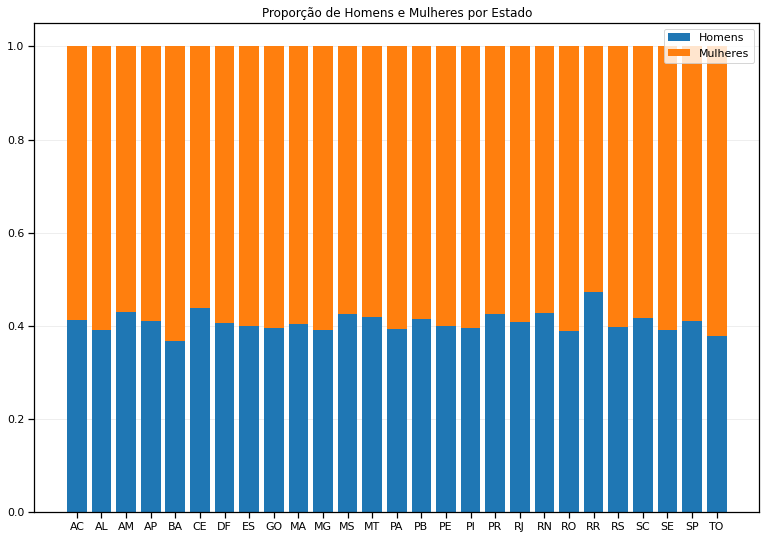

In [28]:
dados_residencia = dados['SG_UF_RESIDENCIA'].value_counts()
dados_sexo_m = dados.query("TP_SEXO == 'M'")['SG_UF_RESIDENCIA'].value_counts()/dados_residencia
dados_sexo_f = dados.query("TP_SEXO == 'F'")['SG_UF_RESIDENCIA'].value_counts()/dados_residencia
uf = dados.SG_UF_RESIDENCIA.unique()
uf.sort()

fig, ax = plt.subplots(figsize=(13,9))
ax.set_title('Proporção de Homens e Mulheres por Estado')
ax.bar(uf, dados_sexo_m, label='Homens')
ax.bar(uf, dados_sexo_f, bottom=dados_sexo_m, label='Mulheres')
ax.set_xticks(uf)
ax.set_xticklabels(uf)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.legend()

plt.show()


Quantidade mulheres maior em quase todos os estado, Roraima parece ter um equilíbrio.

## Análise Exploratória

In [29]:
dados.query("NU_IDADE == 13")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,...,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,...,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,...,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,...,B,A,A,D,A,B,C,B,C,B


In [30]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()

PE    18
CE    15
BA    14
PA    12
SP    11
MG    11
MA     9
PI     7
GO     7
PB     7
DF     4
MT     4
AM     4
SE     3
PR     3
TO     3
SC     2
RO     2
AL     2
AC     1
RS     1
MS     1
RN     1
ES     1
AP     1
RJ     1
Name: SG_UF_RESIDENCIA, dtype: int64

In [31]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
SP    0.075862
MG    0.075862
MA    0.062069
PI    0.048276
GO    0.048276
PB    0.048276
DF    0.027586
MT    0.027586
AM    0.027586
SE    0.020690
PR    0.020690
TO    0.020690
SC    0.013793
RO    0.013793
AL    0.013793
AC    0.006897
RS    0.006897
MS    0.006897
RN    0.006897
ES    0.006897
AP    0.006897
RJ    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

<AxesSubplot:ylabel='SG_UF_RESIDENCIA'>

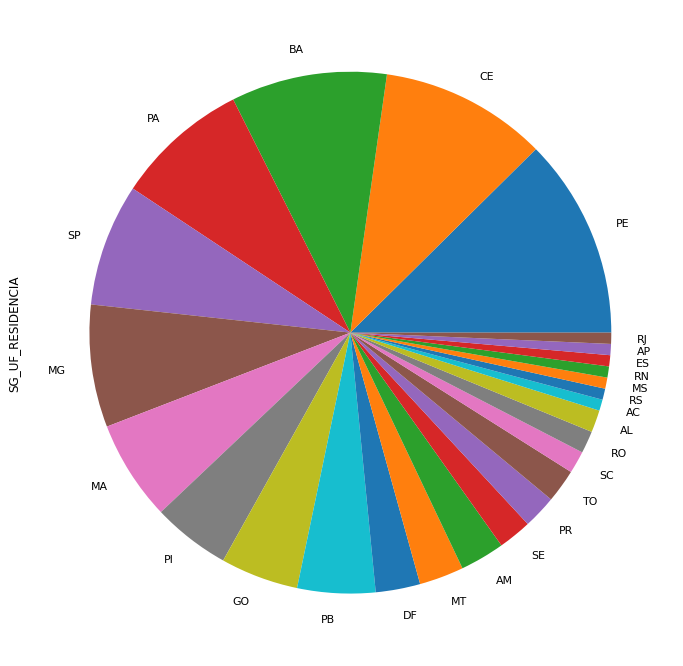

In [32]:
alunos_menor_quartoze = dados.query("NU_IDADE <= 14")
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(12,12))

<AxesSubplot:>

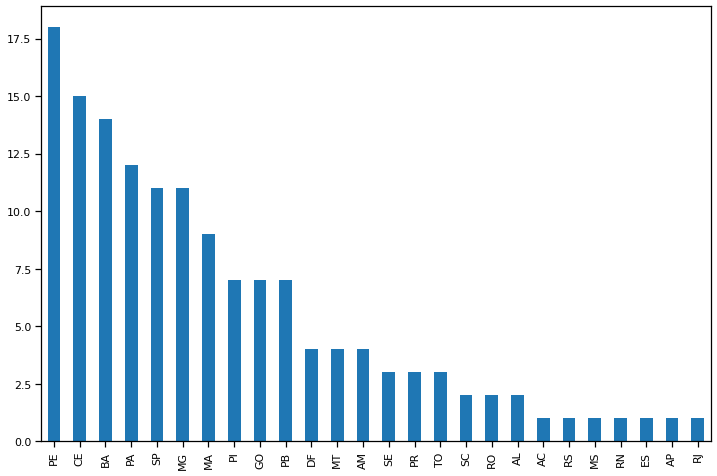

In [33]:
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(12,8))

In [34]:
len(alunos_menor_quartoze)

145

In [35]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

In [36]:
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

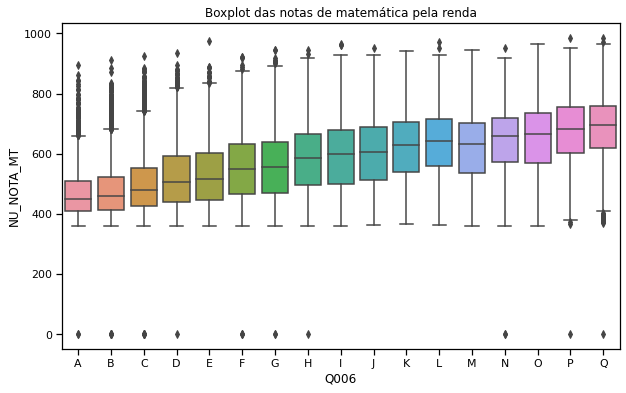

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda")

In [38]:
dados[provas].sum()

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [39]:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

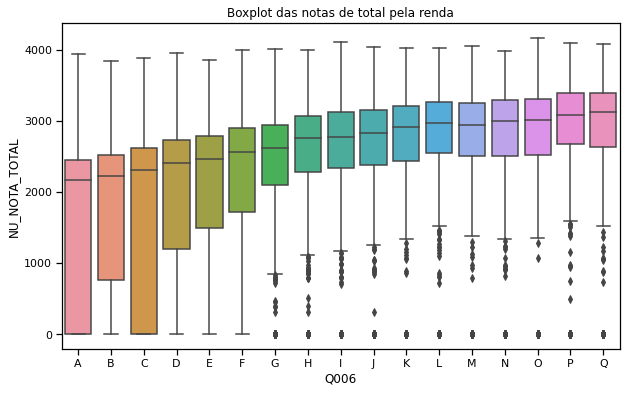

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

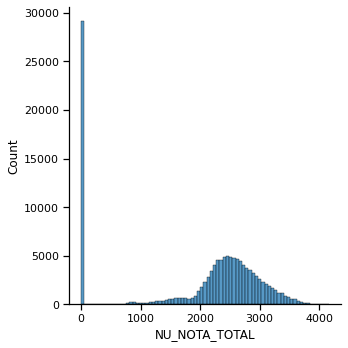

In [41]:
sns.displot(dados, x ="NU_NOTA_TOTAL")

In [42]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


In [43]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

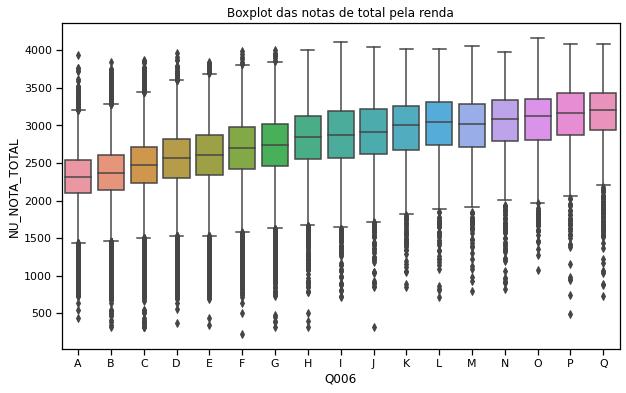

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

Text(0.5, 1.0, 'Boxplot das notas de total pela renda e tipo de estudante')

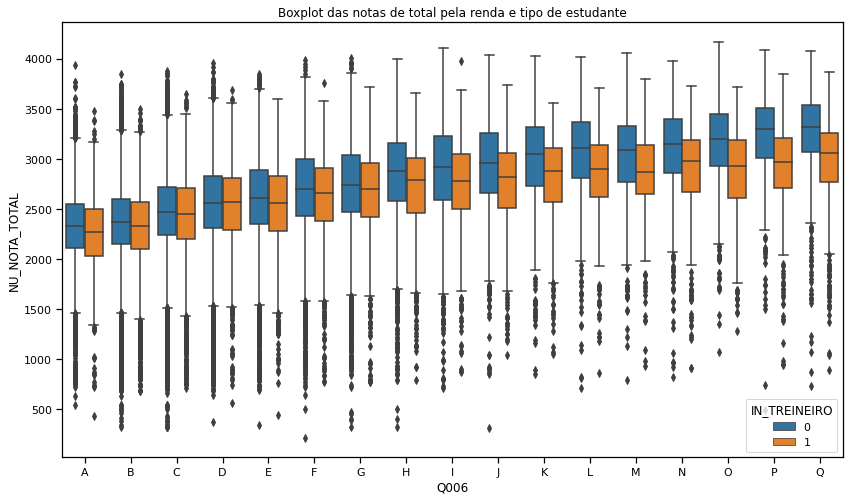

In [45]:
plt.figure(figsize=(14, 8))

sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "IN_TREINEIRO", order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda e tipo de estudante")

### Pegar a amostra completa dos alunos de 13 e 14 anos

In [46]:
# Carregando a base - utilizando dask
df = dd.read_csv('~/ENEM analysis/MICRODADOS_ENEM_2019.csv', encoding = "ISO-8859-1", sep=";")
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A


In [47]:
df_idade_13_14 = df.query("NU_IDADE in (13, 14)").compute()
idade_13_14 = df_idade_13_14["SG_UF_RESIDENCIA"].value_counts()

In [48]:
idade_13_14_prop = (idade_13_14/len(df_idade_13_14))
idade_13_14_dict = {
    'idade':idade_13_14.index,
    'proporcao':idade_13_14.values,
    'proporcao_porcentagem': idade_13_14_prop.values 
}

df_idade_13_14 = pd.DataFrame(data=idade_13_14_dict)
df_idade_13_14

,idade,proporcao,proporcao_porcentagem
0,PA,505,0.091271
1,CE,462,0.083499
2,PE,451,0.081511
3,MA,447,0.080788
4,BA,401,0.072474
5,PB,390,0.070486
6,SP,384,0.069402
7,MG,333,0.060184
8,GO,301,0.054401
9,SE,244,0.044099


### Aumentar a amostra para alunos menores de idade e comparar a proporção por estado.

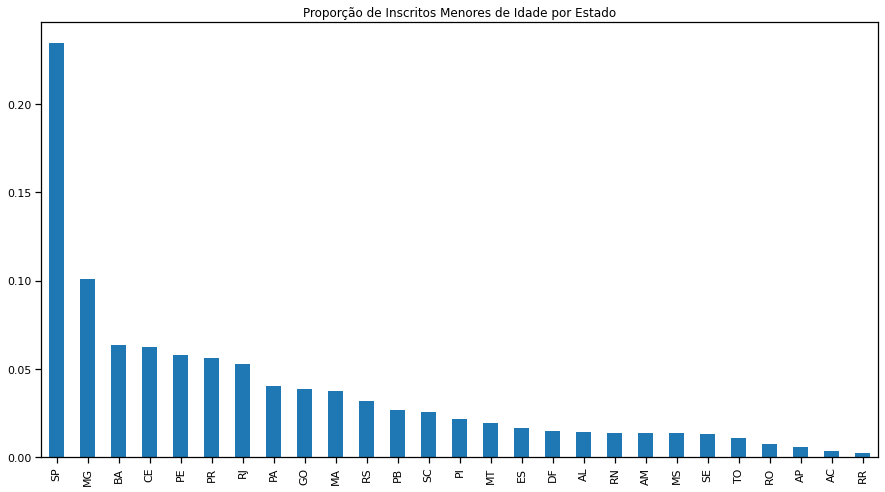

In [49]:
alunos_menor_idade = dados.query("NU_IDADE < 18")
fig, ax = plt.subplots()
ax.set_title("Proporção de Inscritos Menores de Idade por Estado")
alunos_menor_idade["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(15,8), ax=ax)
plt.show()

A distribuição de inscritos menores de idade parece seguir a proporção do quantitativo populacional por estado - quanto mais populoso, maior a quantidade de inscritos.

### Criar uma função para plotar o boxplot do seaborn

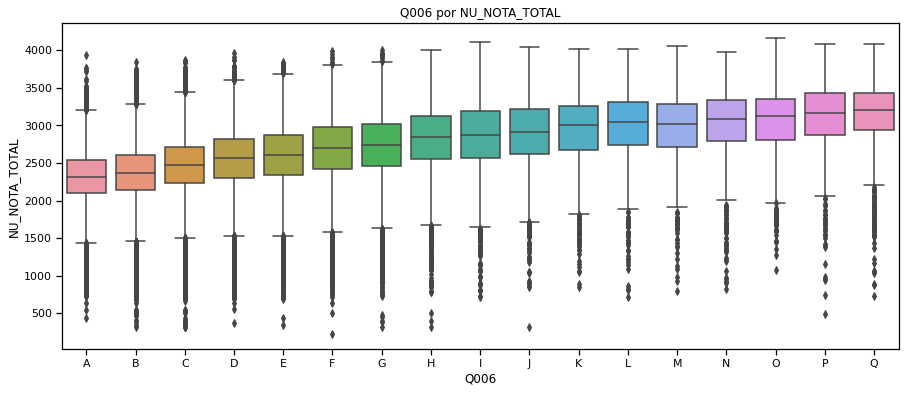

In [50]:
# Método para plotar um boxplot
'''
  Params:
    - df: Dataframe
    - x_field: Campo para o eixo x (label). Por padrão, seleciona o campo relativo à renda familiar do candidato.
    - y_field: Campo para o eixo y (valores). Por padrão, seleciona o campo relativo ao valor total da nota do candidato.
'''

def gen_boxplot_grade_income(df, x_field="Q006", y_field="NU_NOTA_TOTAL"):
  income_sorted = df[x_field].unique()
  income_sorted.sort()
  plt.figure(figsize=(15, 6))
  plt.title("{} por {}".format(x_field, y_field))
  sns.set()
  sns.boxplot(x=x_field, y=y_field, data=df, order=income_sorted)

gen_boxplot_grade_income(dados_sem_notas_zero)

O gráfico apresenta algo que parece já ser uma informação já conhecida: quanto maior a renda, melhor o desempenho. O fato único (pelo menos aqui apresentado) de ter uma renda maior inclui muitas outras variáveis e confluem para o resultado apresentado no gráfico. Por exemplo, quem possui maior renda, geralmente possui carro, tem empregado(a) doméstico(a), estuda em uma escola particular, etc.

### Verificar se quem zerou a prova foi eliminado ou não estava presente 

In [51]:
presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT']
df_nota_zero = dados.query("NU_NOTA_TOTAL == 0")

df_status_zero = {
    i: df_nota_zero[i].value_counts() for i in presenca
}
    
df_status_zero['SITUACAO'] = ['Faltou à Prova', 'Presente na Prova', 'Eliminado na Prova']

df_status_zero = pd.DataFrame(df_status_zero)
df_status_zero

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,SITUACAO
0,29157.0,29001,29001,29157.0,Faltou à Prova
1,5.0,41,41,5.0,Presente na Prova
2,NaN,120,120,NaN,Eliminado na Prova


A maioria dos inscritos que zerou a prova não esteve presente. Dos eliminados, houve, não houve registros de presença nas provas de Ciências da Natureza e Matemática e suas Tecnologias.

### Quem é eliminado tira zero ou será NaN (não teve registro de notas)

In [52]:
# presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT']
eliminados = dados.query("TP_PRESENCA_CN == 2 or TP_PRESENCA_CH == 2 or TP_PRESENCA_LC == 2 or TP_PRESENCA_MT == 2")
# Verificando campos com NaN nos campos relativos às notas das provas
print('Há valores NaN: ',eliminados[provas].isnull().values.any())
# Visualmente
eliminados[provas]


Há valores NaN:  True


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
77,NaN,NaN,NaN,NaN,NaN,0.0
396,NaN,NaN,NaN,NaN,NaN,0.0
446,NaN,NaN,NaN,NaN,NaN,0.0
609,NaN,NaN,NaN,NaN,NaN,0.0
728,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
125216,NaN,NaN,NaN,NaN,NaN,0.0
125503,NaN,472.4,NaN,476.8,520.0,1469.2
125784,NaN,NaN,NaN,NaN,NaN,0.0
126769,NaN,NaN,NaN,NaN,NaN,0.0


Quem tira zero tem a nota assinalada como NaN.

### Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

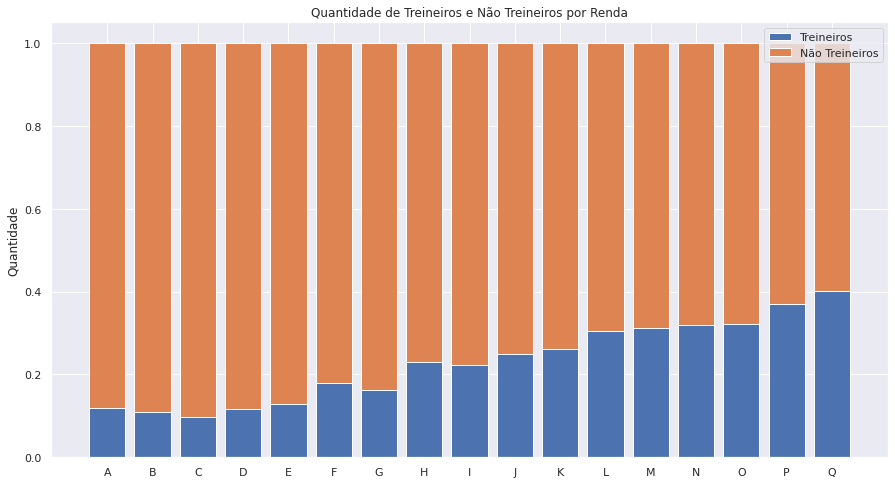

In [53]:
dados_geral_treineiros = dados_sem_notas_zero['Q006'].value_counts()
dados_treineiros = dados_sem_notas_zero.query('IN_TREINEIRO == 1')['Q006'].value_counts()/dados_geral_treineiros
dados_nao_treineiros = dados_sem_notas_zero.query('IN_TREINEIRO == 0')['Q006'].value_counts()/dados_geral_treineiros

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(renda_ordenada, dados_treineiros, label='Treineiros')
ax.bar(renda_ordenada, dados_nao_treineiros, bottom=dados_treineiros, label='Não Treineiros')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Treineiros e Não Treineiros por Renda')
ax.legend()

plt.show()

Quantidade de treineiros parece ser maior à medida que a renda é maior. Como abordado antes, esse fator se desmembra em outras variáveis. No caso do gráfico acima, uma variável a se levar em consideração pode ser o tempo que pessoas que possuem mais renda tenham para se dedicar aos estudos. Além disso, treineiro também paga a inscrição no ENEM²! 

²https://blog.biologiatotal.com.br/treineiro-do-enem/#:~:text=Treineiros%20também%20pagam%20a%20inscrição,não%20ficará%20isento%20da%20inscrição.

### Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

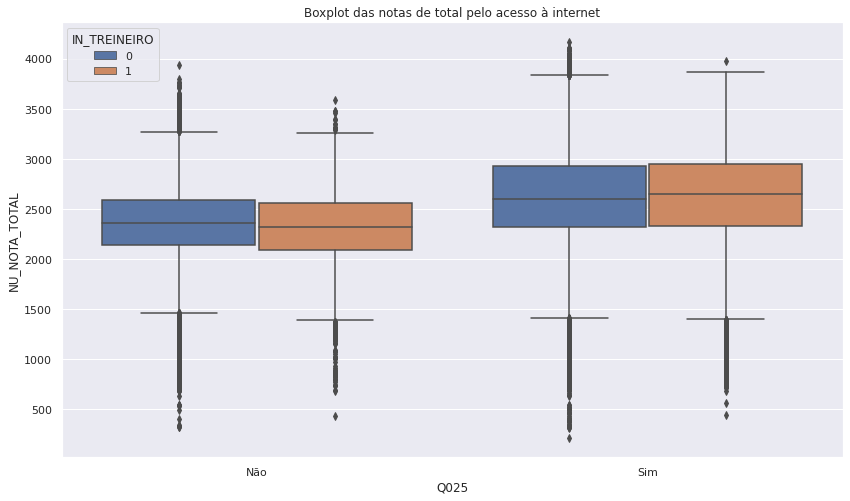

In [54]:
acesso_internet = dados["Q025"].unique()
acesso_internet.sort()
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x="Q025", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, hue = "IN_TREINEIRO", order=acesso_internet)
ax.set_xticklabels(['Não', 'Sim'])
plt.title("Boxplot das notas de total pelo acesso à internet")
plt.show()

## Distribuições e Correlações

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Count'>

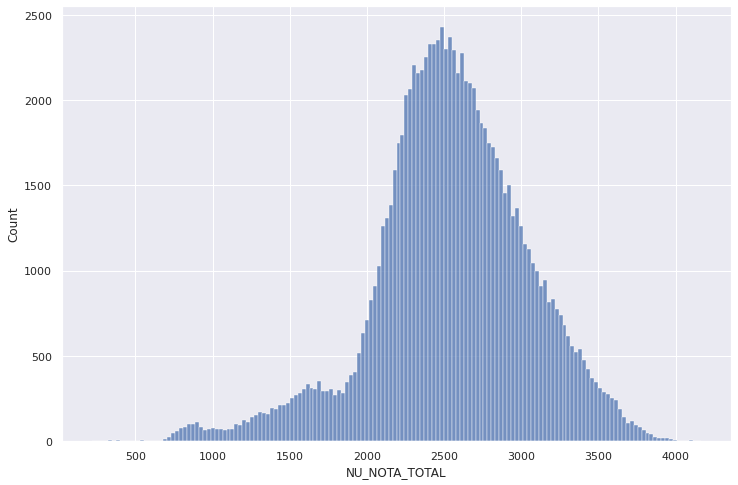

In [55]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL")

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Count'>

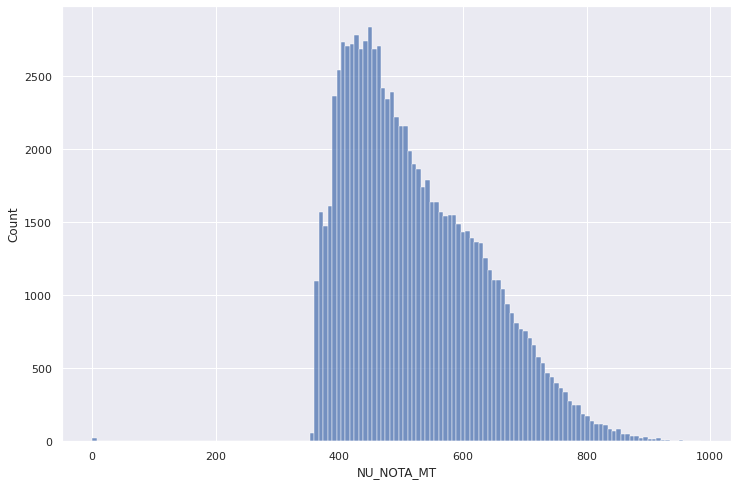

In [56]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_MT")

<AxesSubplot:xlabel='NU_NOTA_LC', ylabel='Count'>

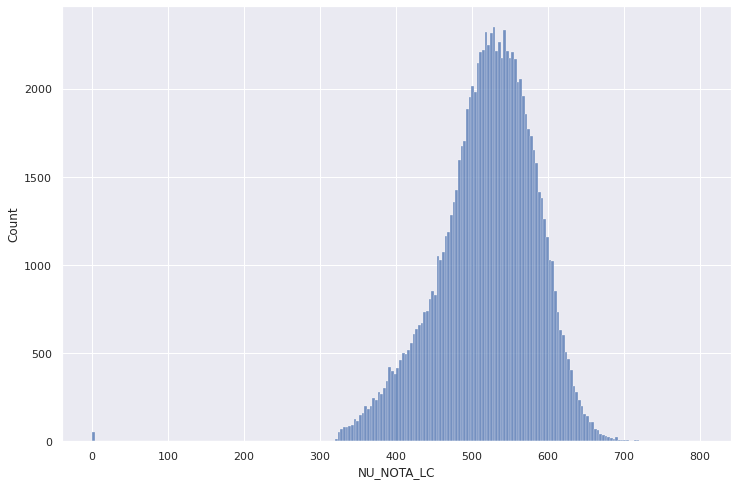

In [57]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_LC")

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Count'>

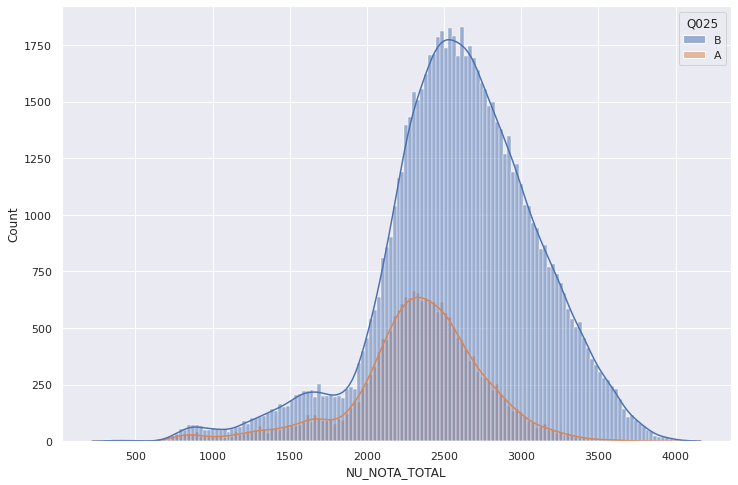

In [58]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Probability'>

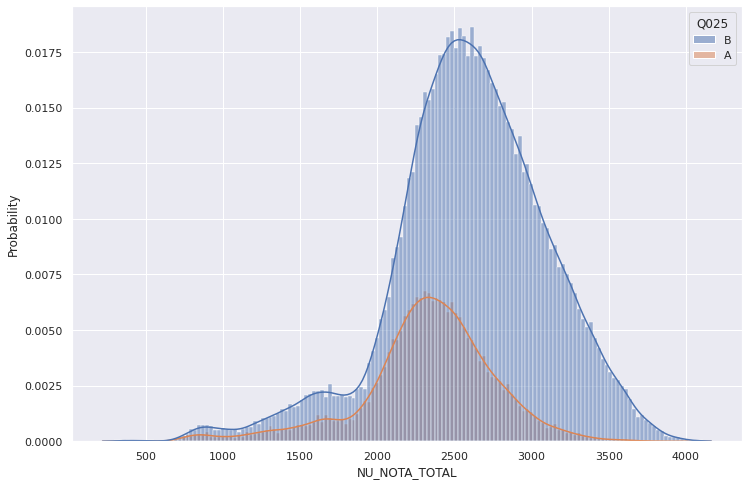

In [59]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability")

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Density'>

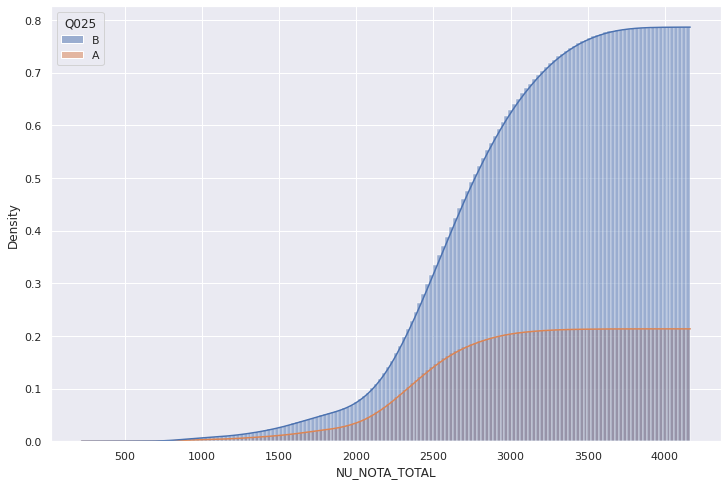

In [60]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)

(-50.0, 1050.0)

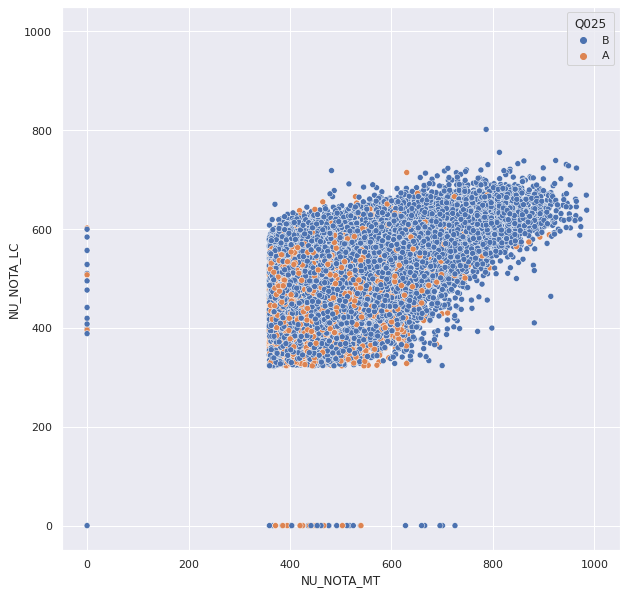

In [61]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_sem_notas_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [62]:
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

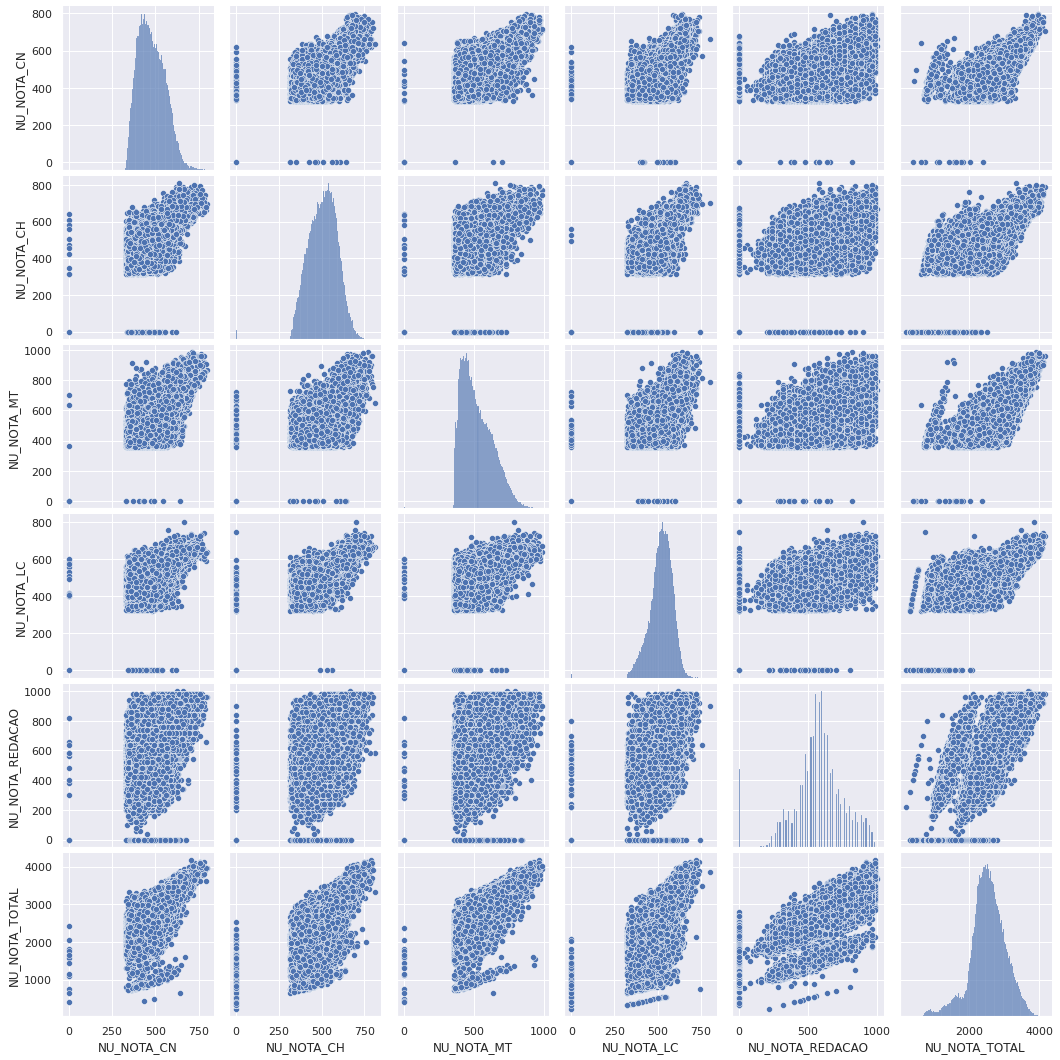

In [63]:
sns.pairplot(dados_sem_notas_zero[provas])

In [64]:
correlacao = dados_sem_notas_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


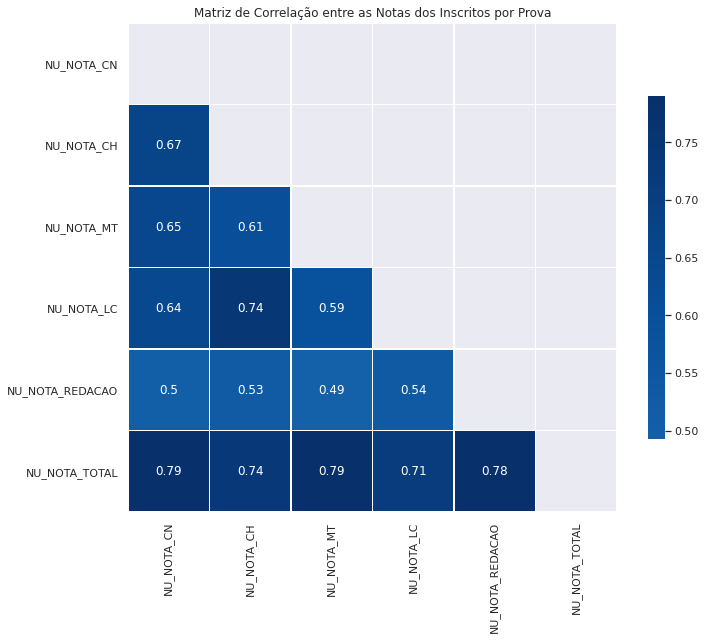

In [65]:
mask = np.triu(np.ones_like(correlacao, dtype=bool))
  
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Matriz de Correlação entre as Notas dos Inscritos por Prova')

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlacao, mask=mask, cmap='Blues', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7}, annot=True)

plt.show()

### Plotar as médias, medianas e moda nas notas de LC e MT (matplotlib linha vertical)

In [66]:
def gen_plot(ax, val, df, fig):
  axis_plot = sns.histplot(ax= ax, data=df, x = val, element="poly")
    
  mean = df[val].mean()
  median = df[val].median()
  mode = df[val].mode()[0]

  ax.axvline(mean, color='b', linewidth=2, linestyle='--', label='Média: {:.1f}'.format(mean))
  ax.axvline(median, color='r', linewidth=2, linestyle='--', label='Mediana: {:.1f}'.format(median))
  ax.axvline(mode, color='y', linewidth=2, linestyle='--', label='Moda: {:.1f}'.format(mode))

  ax.set_title("Histograma - {}".format(val))

  x, y = axis_plot.get_ylim()

  # ax.annotate('média '+str(np.around(mean,1)),
  #           xy=(mean, y/1.5),
  #           xycoords='data',
  #           xytext=(-150,-100),
  #           textcoords='offset points',
  #           arrowprops=dict(headwidth=10, width=4, color='b', connectionstyle="angle3,angleA=0,angleB=-90"),
  #           fontsize=12)
  
  # ax.annotate('mediana '+str(np.around(median,1)),
  #           xy=(median,  (y/1.5)),
  #           xycoords='data',
  #           xytext=(-100,-150),
  #           textcoords='offset points',
  #           arrowprops=dict(headwidth=10, width=4, color='r', connectionstyle="angle3,angleA=0,angleB=-90"),
  #           fontsize=12)
  
  # ax.annotate('moda '+str(np.around(mode,1)),
  #           xy=(mode,  y/1.5),
  #           xycoords='data',
  #           xytext=(-100,-200),
  #           textcoords='offset points',
  #           arrowprops=dict(headwidth=10, width=4, color='y', connectionstyle="angle3,angleA=0,angleB=-90"),
  #           fontsize=12)
  
  ax.legend(loc=0)

def gen_describe_on_hist(x_provas, df):
  sns.set()
  N = len(x_provas)
  cols = 2
  rows = int(math.ceil(N / cols))

  gs = gridspec.GridSpec(rows, cols)
  dims = (25,8)

  if(rows > 1):
    dims = (24, 20)
  fig = plt.figure(figsize=dims)
  for n in range(N):
    ax = fig.add_subplot(gs[n])
    gen_plot(ax, x_provas[n], df, fig)

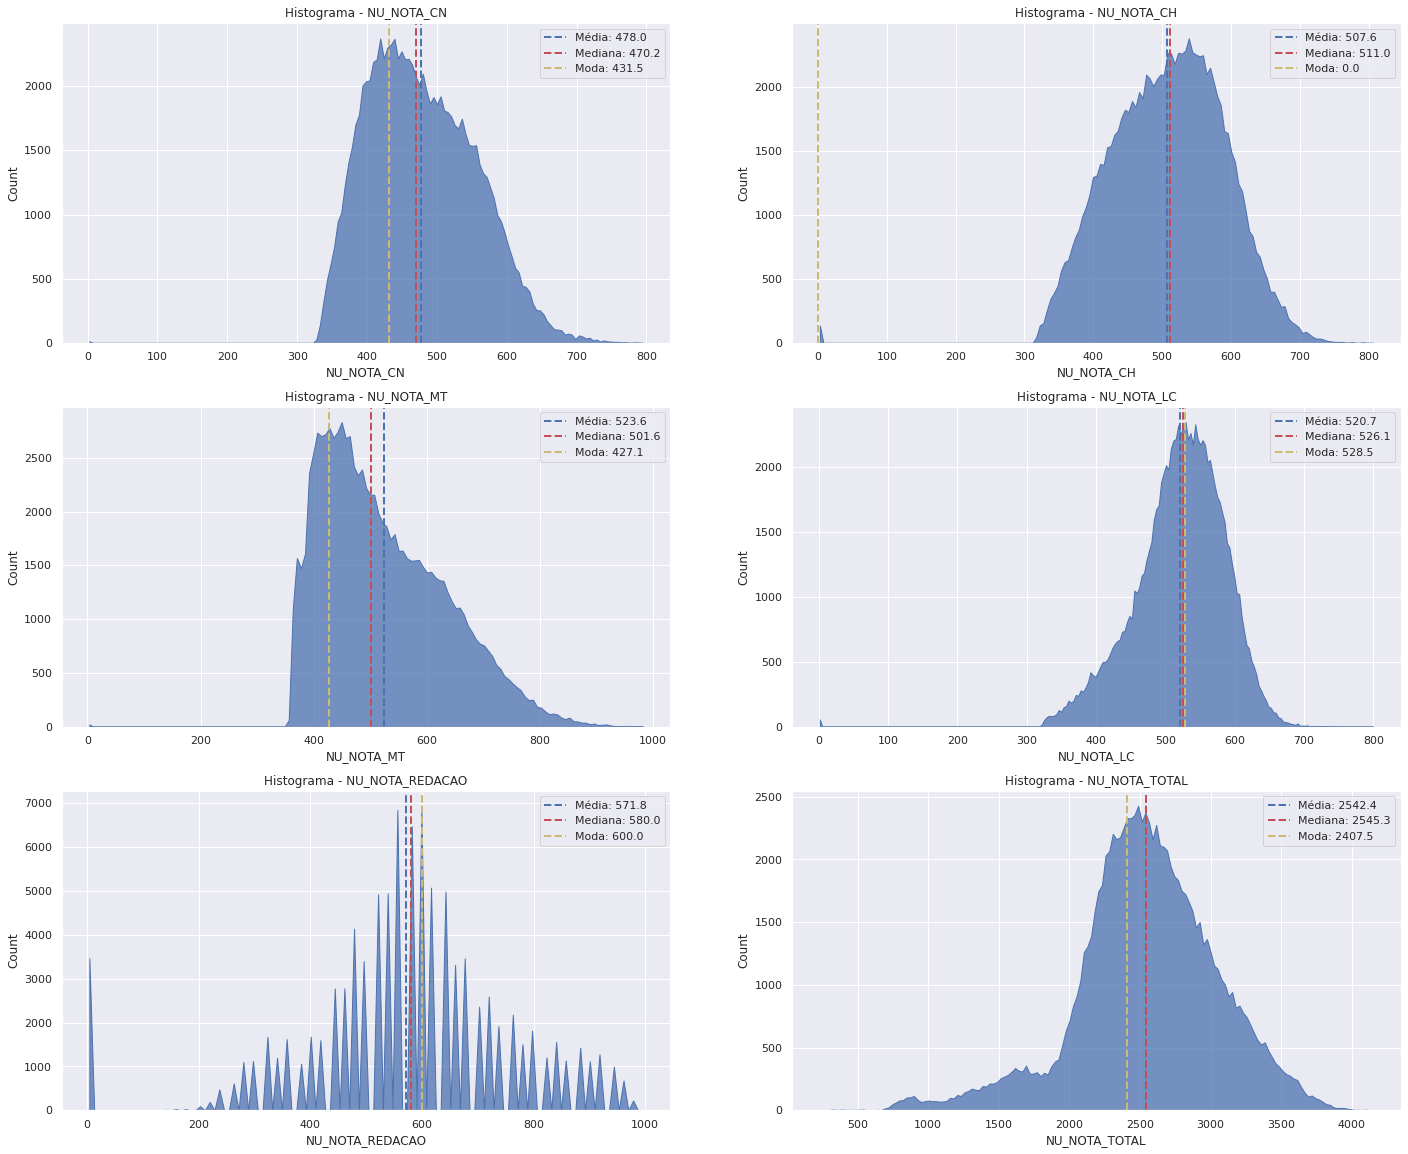

In [67]:
# Média, mediana e moda das notas
# O parâmetro é uma lista com os nomes dos campos das provas
gen_describe_on_hist(provas, dados_sem_notas_zero)

### Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

In [68]:
def gen_coor_matrix(correlacao):
  mask = np.triu(np.ones_like(correlacao, dtype=bool))
  
  f, ax = plt.subplots(figsize=(11, 9))
  ax.set_title('Matriz de Correlação entre as Notas dos Inscritos por Prova')

  cmap = sns.diverging_palette(230, 20, as_cmap=True)

  sns.heatmap(correlacao, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

  plt.show()

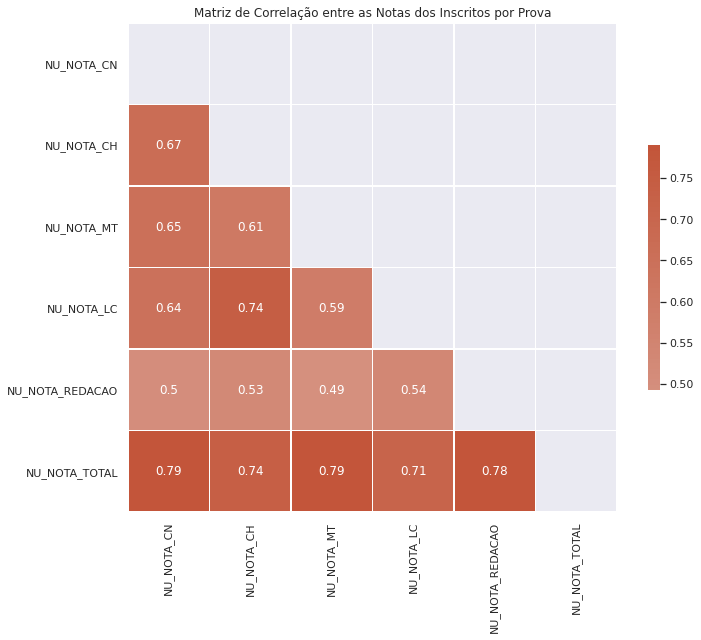

In [69]:
correlacao = dados_sem_notas_zero[provas].corr()
gen_coor_matrix(correlacao)

### Filtrar as notas por algum estado e refazer as análises, verificando se são semelhantes ao geral.

In [70]:
# Geração dos datasets para o estado do Rio Grande do Sul
# df_rs = dados.query("SG_UF_RESIDENCIA == 'rs'")
df_rs_nota_sem_zero = dados.query("NU_NOTA_TOTAL != 0 and SG_UF_RESIDENCIA == 'RS'")
df_rs_nota_sem_zero

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
17134,190001684775,2019,4315602,Rio Grande,43,RS,20,F,1,2,...,A,A,B,A,A,C,A,B,B,1418.4
17135,190001684810,2019,4314902,Porto Alegre,43,RS,21,F,1,1,...,A,B,C,A,B,D,A,B,B,3310.4
17136,190001684848,2019,4316907,Santa Maria,43,RS,17,F,1,3,...,A,A,C,A,B,E,A,C,B,3023.4
17137,190001684857,2019,4314407,Pelotas,43,RS,35,M,3,0,...,A,B,D,B,B,D,B,B,B,2905.4
17140,190001684958,2019,4301859,Barra do Guarita,43,RS,17,F,1,3,...,A,A,B,A,A,B,A,A,A,2204.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127258,190006113287,2019,4307401,Esmeralda,43,RS,17,M,1,1,...,A,B,D,A,B,E,A,C,B,3355.3
127300,190006116301,2019,4314100,Passo Fundo,43,RS,17,F,1,2,...,A,A,C,A,A,C,A,B,B,2472.7
127302,190006116305,2019,4317608,Santo Antônio da Patrulha,43,RS,22,F,1,3,...,A,A,B,A,A,B,A,A,A,2547.4
127340,190006117776,2019,4305108,Caxias do Sul,43,RS,17,F,1,1,...,A,B,A,A,A,C,A,C,B,3082.7


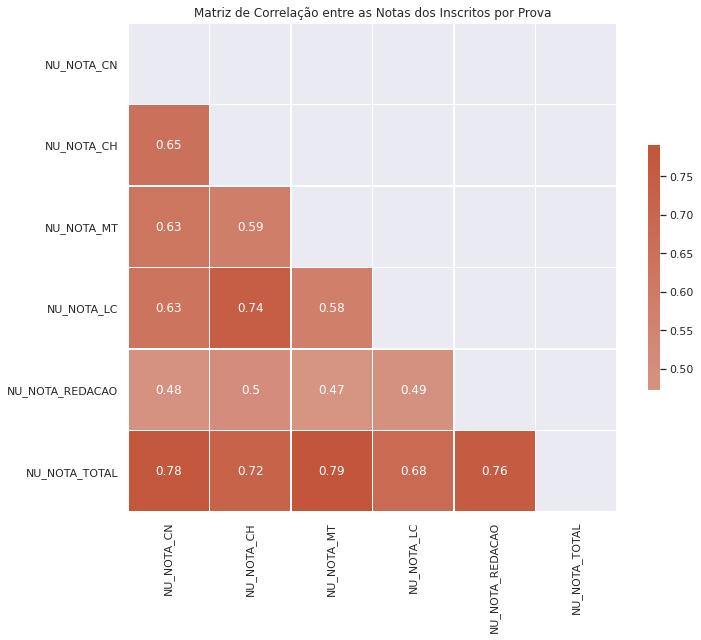

In [71]:
correlacao_rs = df_rs_nota_sem_zero[provas].corr()
gen_coor_matrix(correlacao_rs)

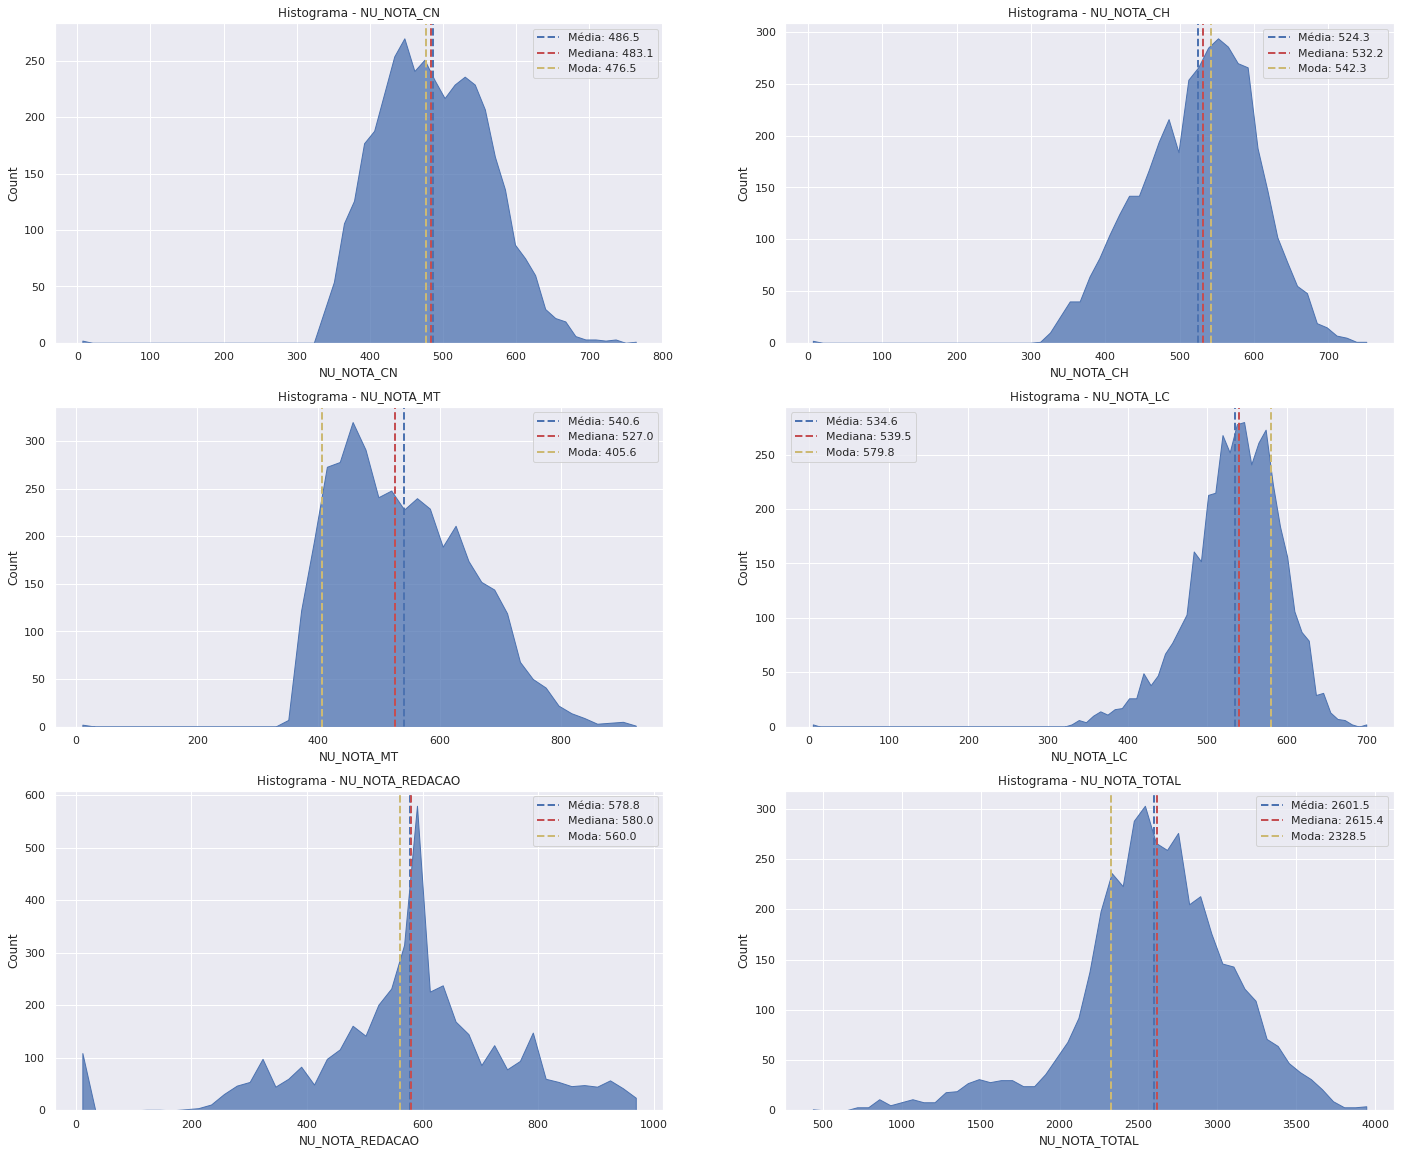

In [72]:
# Média, mediana e moda das notas do estado do Rio Grande do Sul
gen_describe_on_hist(provas, df_rs_nota_sem_zero)

### Pensar sobre a correlação entre Matemática e Linguagens

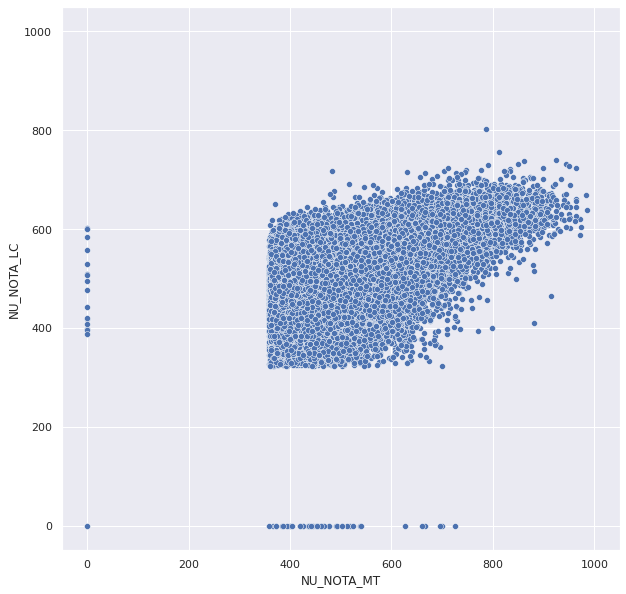

In [73]:
plt.figure(figsize=(10, 10))
sns.set()
sns.scatterplot(data = dados_sem_notas_zero, x="NU_NOTA_MT", y="NU_NOTA_LC")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))
plt.show()

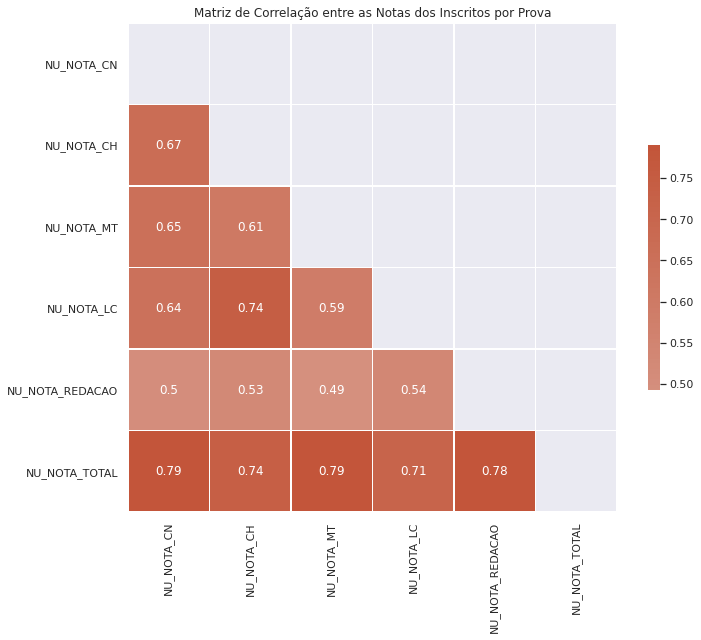

In [74]:
correlacao = dados_sem_notas_zero[provas].corr()
gen_coor_matrix(correlacao)

Português e matemática são duas das matérias que mais se destacam durante a vida de um estudante, o acompanham desde as primeiras séries, passando pelo vestibular e até em concursos públicos. Apesar de andarem praticamente juntas, a correlação acima apresenta a nota de Linguagens e Códigos - que inclui a língua portuguesa - tendo uma relação mais forte com a nota de Ciências Humanas. Tanto ela quanto a nota de matemática.

## Prevendo notas com Machine Learning

In [75]:
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

In [76]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]

In [77]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [78]:
x = notas_entrada
y = notas_saida 

In [79]:
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,random_state=SEED)

In [80]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(random_state=4321)

In [81]:
predicoes_matematica = modelo.predict(x_teste)

In [82]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

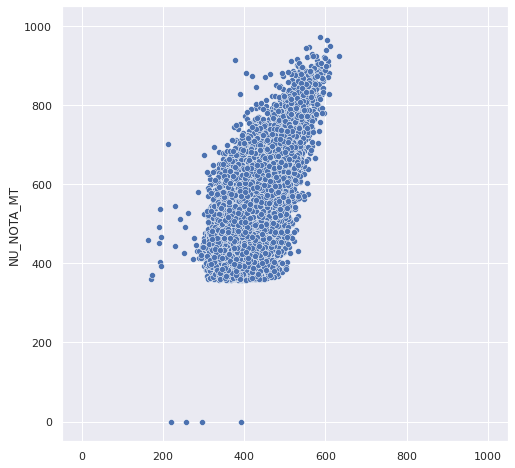

In [83]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=predicoes_matematica, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='NU_NOTA_MT'>

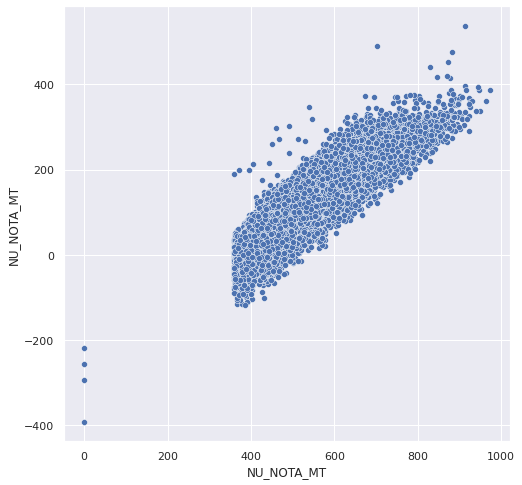

In [84]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)


(-50.0, 1050.0)

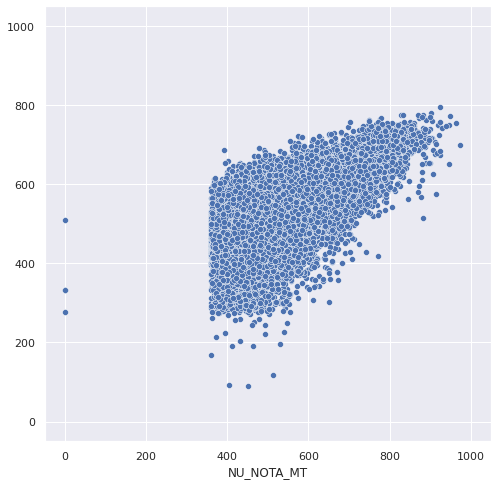

In [85]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [86]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [87]:
resultados

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,420.319501,39.380499,1550.823695
104685,617.2,478.717001,138.482999,19177.541062
91028,520.0,385.706927,134.293073,18034.629483
115802,703.8,459.039807,244.760193,59907.551863
93303,627.1,441.995627,185.104373,34263.628799
...,...,...,...,...
81393,688.6,482.168386,206.431614,42614.011438
40159,479.1,489.849362,-10.749362,115.548776
64083,501.4,471.762378,29.637622,878.388662
84661,772.5,540.546723,231.953277,53802.322714


In [88]:
resultados["quadrado_diferenca"].mean()

18324.119724009073

In [89]:
resultados["quadrado_diferenca"].mean()**(1/2)

135.366612294203

In [90]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [91]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

12063.645588509502

In [92]:
mean_squared_error(y_teste, predicoes_matematica)

18324.11972400897

### Procurar outro modelo de ML para treinar e comparar com os modelos já criados

In [93]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
x_notas = dados_sem_notas_zero[provas_entrada]
y_notas = dados_sem_notas_zero[prova_saida]

In [94]:
# from sklearn.model_selection import train_test_split
SEED = 4321
x_treino, x_teste, y_treino, y_teste = train_test_split(x_notas, y_notas, test_size = 0.25, random_state=SEED)

In [95]:
# Já feito
from sklearn.svm import LinearSVR
modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)
predicoes_matematica = modelo.predict(x_teste)

resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2
resultados

/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,420.319501,39.380499,1550.823695
104685,617.2,478.717001,138.482999,19177.541062
91028,520.0,385.706927,134.293073,18034.629483
115802,703.8,459.039807,244.760193,59907.551863
93303,627.1,441.995627,185.104373,34263.628799
...,...,...,...,...
81393,688.6,482.168386,206.431614,42614.011438
40159,479.1,489.849362,-10.749362,115.548776
64083,501.4,471.762378,29.637622,878.388662
84661,772.5,540.546723,231.953277,53802.322714


In [96]:
# Outro modelo: LinearRegression
from sklearn.linear_model import LinearRegression
modelo_lr = LinearRegression()
modelo_lr.fit(x_treino, y_treino)
predicao_lr = modelo_lr.predict(x_teste)

resultados_lr = pd.DataFrame()
resultados_lr["Real"] = y_teste
resultados_lr["Previsao"] = predicao_lr
resultados_lr["diferenca"] = resultados_lr["Real"] - resultados_lr["Previsao"]
resultados_lr["quadrado_diferenca"] = (resultados_lr["Real"] - resultados_lr["Previsao"])**2
resultados_lr

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,538.001248,-78.301248,6131.085489
104685,617.2,609.727861,7.472139,55.832863
91028,520.0,487.444227,32.555773,1059.878331
115802,703.8,569.129404,134.670596,18136.169449
93303,627.1,561.309031,65.790969,4328.451642
...,...,...,...,...
81393,688.6,602.279709,86.320291,7451.192655
40159,479.1,629.342491,-150.242491,22572.805986
64083,501.4,584.245996,-82.845996,6863.459119
84661,772.5,720.901846,51.598154,2662.369527


In [97]:
# Outro modelo: SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_treino)
x_sgd_treino = scaler.transform(x_treino)
x_sgd_teste = scaler.transform(x_teste)

n_iter=100
modelo_sgd = SGDRegressor(max_iter=n_iter)
modelo_sgd.fit(x_sgd_treino, y_treino)
predicao_sgd = modelo_sgd.predict(x_sgd_teste)

resultados_sgd = pd.DataFrame()
resultados_sgd["Real"] = y_teste
resultados_sgd["Previsao"] = predicao_sgd
resultados_sgd["diferenca"] = resultados_sgd["Real"] - resultados_sgd["Previsao"]
resultados_sgd["quadrado_diferenca"] = (resultados_sgd["Real"] - resultados_sgd["Previsao"])**2
resultados_sgd

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,537.911857,-78.211857,6117.094647
104685,617.2,609.028553,8.171447,66.772549
91028,520.0,487.365037,32.634963,1065.040785
115802,703.8,569.096886,134.703114,18144.928884
93303,627.1,561.077342,66.022658,4358.991388
...,...,...,...,...
81393,688.6,602.370291,86.229709,7435.562673
40159,479.1,630.094311,-150.994311,22799.281828
64083,501.4,584.408065,-83.008065,6890.338897
84661,772.5,719.834548,52.665452,2773.649789


In [98]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = SEED) 
regressor.fit(x_treino, y_treino)
predicao_rf = regressor.predict(x_teste) 

resultados_rf = pd.DataFrame()
resultados_rf["Real"] = y_teste
resultados_rf["Previsao"] = predicao_rf
resultados_rf["diferenca"] = resultados_rf["Real"] - resultados_rf["Previsao"]
resultados_rf["quadrado_diferenca"] = (resultados_rf["Real"] - resultados_rf["Previsao"])**2
resultados_rf

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,538.066,-78.366,6141.229956
104685,617.2,570.176,47.024,2211.256576
91028,520.0,490.573,29.427,865.948329
115802,703.8,552.044,151.756,23029.883536
93303,627.1,554.462,72.638,5276.279044
...,...,...,...,...
81393,688.6,574.909,113.691,12925.643481
40159,479.1,681.172,-202.072,40833.093184
64083,501.4,576.068,-74.668,5575.310224
84661,772.5,796.186,-23.686,561.026596


Média quadrada de erro utilizando LinearSVR: 18324.11972400897
Média quadrada de erro utilizando LinearRegression: 5961.372212400363
Média quadrada de erro utilizando SGDRegression: 5963.035609542291
Média quadrada de erro utilizando RandomForest: 5785.799516521289


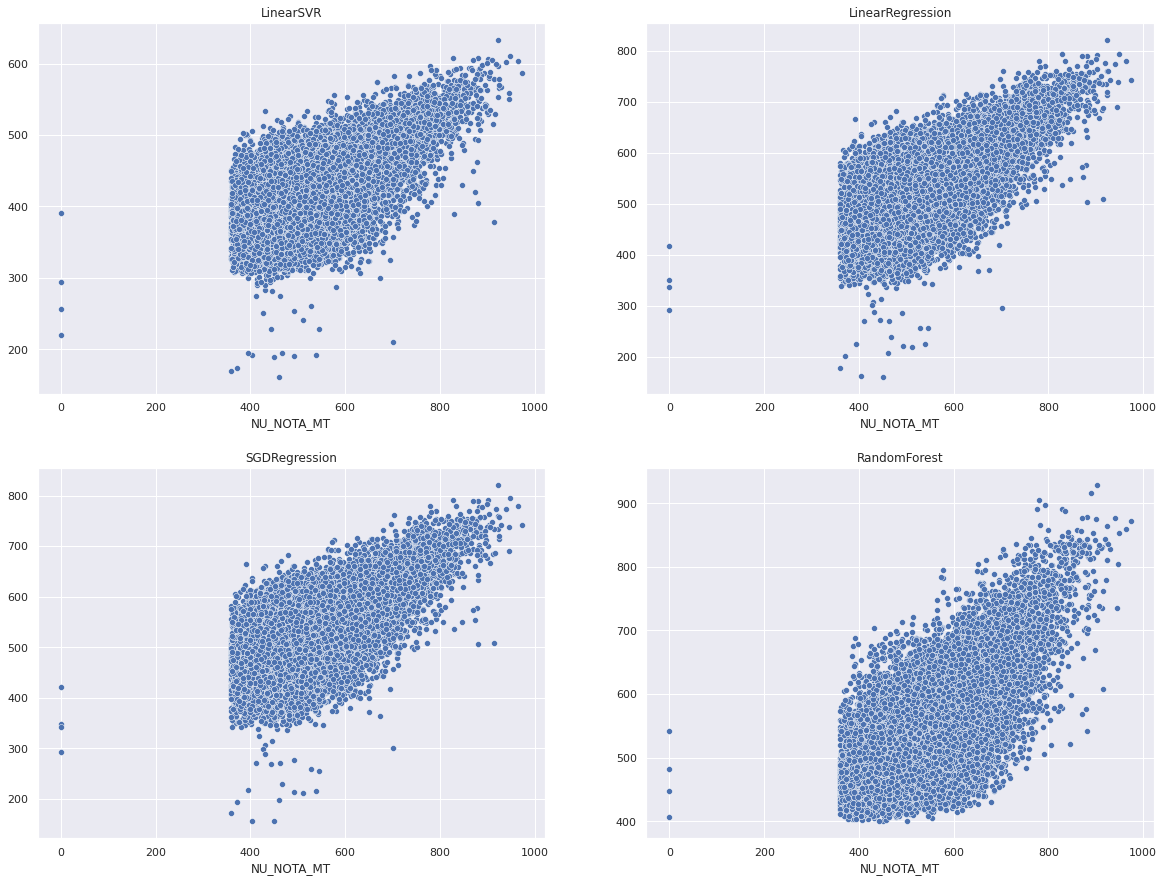

In [99]:
# Comparação entre os resultados obtidos com os diferentes métodos
print("Média quadrada de erro utilizando LinearSVR: {}".format(metrics.mean_squared_error(y_teste, predicoes_matematica)))
print("Média quadrada de erro utilizando LinearRegression: {}".format(metrics.mean_squared_error(y_teste, predicao_lr)))
print("Média quadrada de erro utilizando SGDRegression: {}".format(metrics.mean_squared_error(y_teste, predicao_sgd)))
print("Média quadrada de erro utilizando RandomForest: {}".format(metrics.mean_squared_error(y_teste, predicao_rf)))

sns.set()
fig, axes = plt.subplots(2,2, figsize=(20, 15)) 
axes[0,0].set_title("LinearSVR")
axes[0,1].set_title("LinearRegression")
axes[1,0].set_title("SGDRegression")
axes[1,1].set_title("RandomForest")

sns.scatterplot(x=y_teste, y=predicoes_matematica, ax=axes[0,0])
sns.scatterplot(x=y_teste, y=predicao_lr, ax=axes[0,1])
sns.scatterplot(x=y_teste, y=predicao_sgd, ax=axes[1,0])
sns.scatterplot(x=y_teste, y=predicao_rf, ax=axes[1,1])

plt.show()


### Ler a documentação do Dummy e alterar o método de regressão

In [100]:
# Já feito
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

resultados_dummy = pd.DataFrame()
resultados_dummy["Real"] = y_teste
resultados_dummy["Previsao"] = dummy_predicoes
resultados_dummy["diferenca"] = resultados_dummy["Real"] - resultados_dummy["Previsao"]
resultados_dummy["quadrado_diferenca"] = (resultados_dummy["Real"] - resultados_dummy["Previsao"])**2
resultados_dummy

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,523.339552,-63.639552,4049.992601
104685,617.2,523.339552,93.860448,8809.783666
91028,520.0,523.339552,-3.339552,11.152609
115802,703.8,523.339552,180.460448,32565.973229
93303,627.1,523.339552,103.760448,10766.230533
...,...,...,...,...
81393,688.6,523.339552,165.260448,27311.015616
40159,479.1,523.339552,-44.239552,1957.137977
64083,501.4,523.339552,-21.939552,481.343950
84661,772.5,523.339552,249.160448,62080.928761


In [101]:
# Modificando o dummy
modelo_dummy = DummyRegressor(strategy="mean")
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

resultados_dummy = pd.DataFrame()
resultados_dummy["Real"] = y_teste
resultados_dummy["Previsao"] = dummy_predicoes
resultados_dummy["diferenca"] = resultados_dummy["Real"] - resultados_dummy["Previsao"]
resultados_dummy["quadrado_diferenca"] = (resultados_dummy["Real"] - resultados_dummy["Previsao"])**2
resultados_dummy

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,523.339552,-63.639552,4049.992601
104685,617.2,523.339552,93.860448,8809.783666
91028,520.0,523.339552,-3.339552,11.152609
115802,703.8,523.339552,180.460448,32565.973229
93303,627.1,523.339552,103.760448,10766.230533
...,...,...,...,...
81393,688.6,523.339552,165.260448,27311.015616
40159,479.1,523.339552,-44.239552,1957.137977
64083,501.4,523.339552,-21.939552,481.343950
84661,772.5,523.339552,249.160448,62080.928761


### Buscar outra métrica para avaliar modelos de regressão

In [102]:
def gen_some_metrics(test, predictions):
  return {
      'Max Error': metrics.max_error(test, predictions),    
      'Mean Absolute Error': metrics.mean_absolute_error(test, predictions),
      'Mean Square Error': metrics.mean_squared_error(test, predictions),
      'Median Absolute Error': metrics.median_absolute_error(test, predictions)
  }

lsrv = gen_some_metrics(y_teste, predicoes_matematica)
lr = gen_some_metrics(y_teste, predicao_lr)
sdg = gen_some_metrics(y_teste, predicao_sgd)
rf = gen_some_metrics(y_teste, predicao_rf)

metrics_dict = { 
    'LinearSVR': lsrv,
    'LinearRegression': lr,
    'SGDRegression': sdg,
    'RandomForest': rf
}
metrics_pd = pd.DataFrame.from_dict(metrics_dict)
metrics_pd.transpose()

,Max Error,Mean Absolute Error,Mean Square Error,Median Absolute Error
LinearSVR,536.537205,111.540159,18324.119724,99.889612
LinearRegression,417.817880,62.333185,5961.372212,53.872559
SGDRegression,421.515921,62.344167,5963.035610,53.963981
RandomForest,542.402000,60.809262,5785.799517,52.225000


## Validação de Modelo e Overfit

In [103]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino, y_treino)
predicoes_matematica = modelo.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica)

/home/gustavo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


18324.11972400897

In [104]:
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematica_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica_arvore)


6030.333641957363

In [105]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()



In [106]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()
desvio_padrao = (resultados["test_score"]*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Intervalo de confiança 6015.722549536812 - 7100.732779780729


In [107]:
resultados["test_score"]*-1

array([6118.6911947 , 6536.09830186, 6338.64260896, 6456.70685686,
       6234.97203593, 6794.25120283, 6713.45694262, 6693.04880297,
       6610.58461646, 7085.82408339])

In [108]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [109]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

SEED= 1232
np.random.seed(SEED)



partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 5858.741842392759 - 6250.793292491384


In [110]:
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

regressor_arvore(4)

Treino = 5760.834451245899|Teste = 5815.707286597402


In [111]:
for i in range(1,21):
    regressor_arvore(i)

Treino = 7844.952652412207|Teste = 7857.871770206351
Treino = 6527.783475408351|Teste = 6556.886287657656
Treino = 6021.275229419075|Teste = 6054.767567442072
Treino = 5760.834451245899|Teste = 5815.707286597402
Treino = 5598.158955426787|Teste = 5675.196789060744
Treino = 5469.677369145869|Teste = 5593.304363812442
Treino = 5369.458309852721|Teste = 5541.646599457925
Treino = 5276.16965707928|Teste = 5542.053091078966
Treino = 5166.713159932668|Teste = 5608.390265709719
Treino = 5022.598049115693|Teste = 5761.4934268457555
Treino = 4833.560706021637|Teste = 5955.958714168911
Treino = 4598.125022484774|Teste = 6216.553608637031
Treino = 4316.3791662866815|Teste = 6514.07032957674
Treino = 4000.6209880837496|Teste = 6848.344737600635
Treino = 3655.8197526274853|Teste = 7235.435245488157
Treino = 3295.832684540846|Teste = 7633.948584409428
Treino = 2931.7212612043872|Teste = 8059.378759944782
Treino = 2575.59534021339|Teste = 8435.937377688437
Treino = 2233.5742434614776|Teste = 8819.086

### Testar com outros parâmetros da árvore de decisão

In [112]:
def regressor_arvore(nivel, ln):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel, max_leaf_nodes=ln)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

regressor_arvore(5, 4)

Treino = 6527.783475408351|Teste = 6556.886287657656


### Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn

In [113]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [5]}
 
gscv = GridSearchCV(DecisionTreeRegressor(), params, scoring='neg_mean_squared_error')
modelo_gscv = DecisionTreeRegressor(max_depth=2)

resultados = cross_validate(modelo_gscv, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

Treino = 6528.5146689340345|Teste = 6554.370636478961


### Plotar um gráfico com test_score e train_test.

In [114]:
valores_treino = []
valores_teste = []

In [115]:
def gen_regressor_arvore(nivel, ln = 5):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel, max_leaf_nodes=ln)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    return ((resultados['train_score']*-1).mean(), (resultados['test_score']*-1).mean())

for teste in range(1,21):
  trn, tst = gen_regressor_arvore(teste)
  valores_treino.append(trn)
  valores_teste.append(tst)

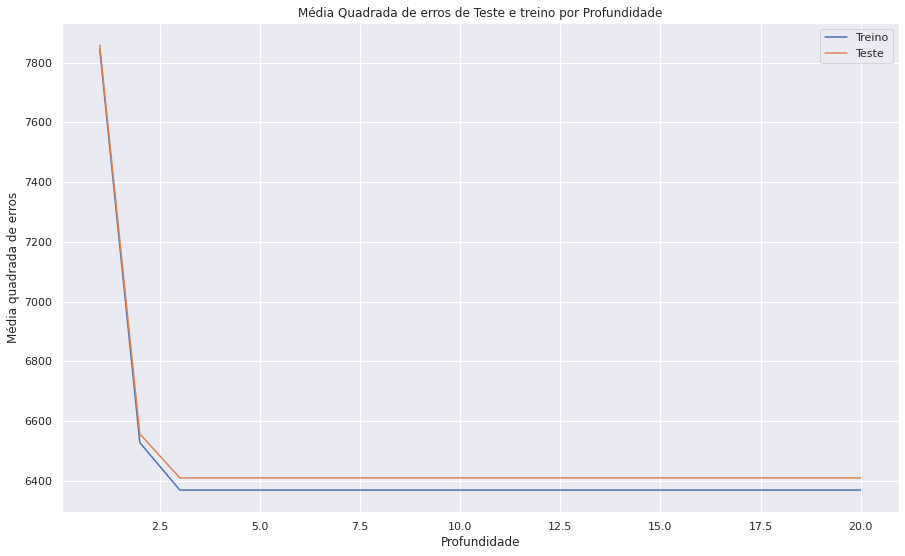

In [116]:
x = [i for i in range(1, 21)]

plt.figure(figsize=(15,9))
plt.plot(x, valores_treino, x, valores_teste)
plt.title("Média Quadrada de erros de Teste e treino por Profundidade")
plt.xlabel('Profundidade')
plt.ylabel('Média quadrada de erros')
plt.legend(['Treino', 'Teste'])
plt.show()